In [1]:
import numpy as np
from statsmodels import regression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math

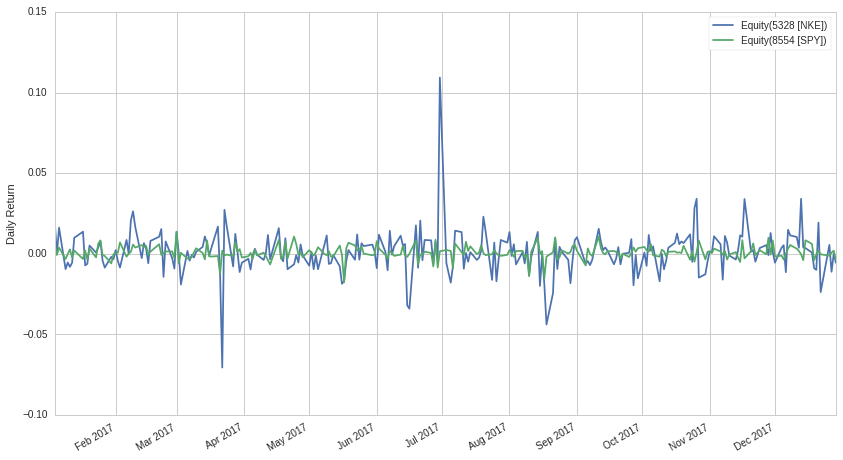

In [6]:
# Get data for the specified period and stocks
start = '2017-01-01'
end = '2018-01-01'
asset = get_pricing('NKE', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

# We have to take the percent changes to get to returns
# Get rid of the first (0th) element because it is NAN
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]

# Let's plot them just for fun
r_a.plot()
r_b.plot()
plt.ylabel("Daily Return")
plt.legend();

In [2]:
def linreg(x,y):
    # We add a constant so that we can also fit an intercept (alpha) to the model
    # This just adds a column of 1s to our data
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    # Remove the constant now that we're done
    x = x[:, 1]
    return model.params[0], model.params[1]

Asset Historical Estimate:
alpha: 0.000374698226743
beta: 0.670678096421
Asset Out of Sample Estimate:
alpha: 0.000830024283255
beta: 0.955157239958
Portfolio Out of Sample:
alpha: 0.000830024283255
beta: 0.284479143538


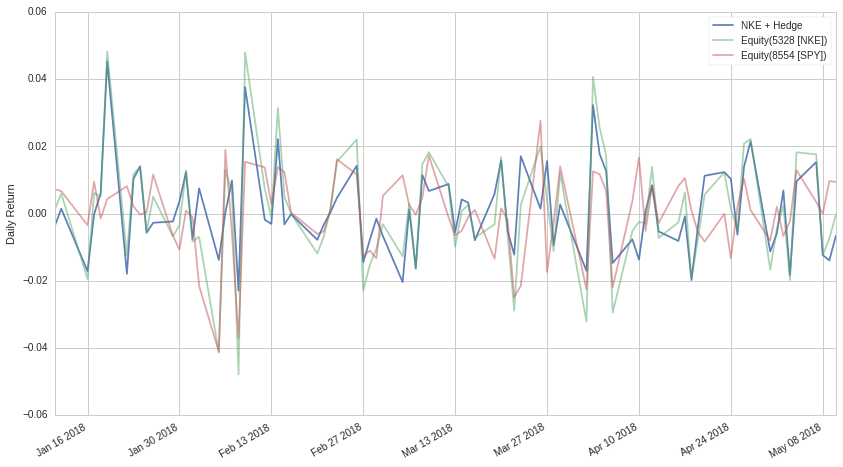

In [5]:
# Get the alpha and beta estimates over the last year
start = '2017-01-01'
end = '2018-01-01'
asset = get_pricing('NKE', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]
X = r_b.values
Y = r_a.values
historical_alpha, historical_beta = linreg(X,Y)
print 'Nike Historical Estimate:'
print 'alpha: ' + str(historical_alpha)
print 'beta: ' + str(historical_beta)

# Get data for a different time frame:
start = '2018-01-10'
end = '2018-05-10'
asset = get_pricing('NKE', fields='price', start_date=start, end_date=end)
benchmark = get_pricing('SPY', fields='price', start_date=start, end_date=end)

# Repeat the process from before to compute alpha and beta for the asset
r_a = asset.pct_change()[1:]
r_b = benchmark.pct_change()[1:]
X = r_b.values
Y = r_a.values
alpha, beta = linreg(X,Y)
print 'Nike Out of Sample Estimate:'
print 'alpha: ' + str(alpha)
print 'beta: ' + str(beta)

# Create hedged portfolio and compute alpha and beta
portfolio = -1*historical_beta*r_b + r_a
P = portfolio.values
alpha, beta = linreg(X,P)
print 'Portfolio Out of Sample:'
print 'alpha: ' + str(alpha)
print 'beta: ' + str(beta)


# Plot the returns of the portfolio as well as the asset by itself
portfolio.name = "NKE + Hedge"
portfolio.plot(alpha=0.9)
r_a.plot(alpha=0.5);
r_b.plot(alpha=0.5)
plt.ylabel("Daily Return")
plt.legend();